**Data Acquisition & Justification**

AI has transformed industries by **automating** tasks once perfomed by humans. The rapid adoption of AI threatens to automate tasks across many occupations, leading to potential widespread job displacement or transformation. To create a predictive model that identifies workers and demographic groups facing the highest susceptibility to automation. The model's output informs targeted government intervention such as vocational training, education reform, or social safety net expansion before major job losses occur.

**Understanding the Task: Predicting Risk**

The challenge in predicting "job loss" is the lack of historical data explicitly labeled with "AI caused job loss." Therefore, the task is reframed from predicting a direct outcome to predicting exposure and susceptibility.

**Data Understanding & Preprocessing**

After acquiring my dataset from Kaggle, **link** :https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030
 I began by loading and inspecting it to understand the structure, key features, and potential issues such as missing or inconsistent values. My goal at this stage was to get a sense of the data’s shape, data types, and distribution of the target variable that indicates job loss risk.


importing necessary Libraries :

In [161]:
print("QC Mtshali",'22364740')

QC Mtshali 22364740


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading my data and view how it looks like :

In [ ]:
path = ("/content/drive/MyDrive/ExamFolder/ai_job_trends_dataset.csv")
QC = pd.read_csv(path)
QC

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"Psychotherapist, dance movement",Education,Increasing,Moderate,142238.00,PhD,16,7816,1363,56.91,27.27,China,65.90
29996,"Scientist, water quality",IT,Decreasing,Moderate,123107.50,Associate Degree,19,9358,7632,27.25,12.84,UK,31.18
29997,Web designer,Manufacturing,Decreasing,Moderate,97305.51,Master’s Degree,0,9605,2559,31.76,16.82,China,26.07
29998,Primary school teacher,Entertainment,Increasing,Moderate,95599.22,High School,15,5481,4879,32.46,45.93,Brazil,40.43


Quick overview of the my data

In [ ]:
QC.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [ ]:
QC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [ ]:
QC.describe()

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


In this step, I focused on understanding the meaning of each column.
Based on the dataset documentation, the key columns included:

Job Title – describes the type of occupation.
Industry – identifies the economic sector where the job belongs.
Education Level – indicates the minimum level of education required for the role.
AI Adoption Rate – shows the percentage of AI implementation in that industry.
Workforce Size – number of workers currently employed in that sector.
Automation Risk – categorical label showing the predicted risk of automation (High, Medium, Low).

I decided to use the Automation_Risk variable as the target feature for my prediction model, since it directly represents the risk of job loss caused by AI automation.

**Data Cleaning**

Now checking for missing values, duplicates, and inconsistencies.
Cleaning is essential to ensure that the model receives reliable input data.

In [ ]:
QC.isnull().sum()

,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [ ]:
QC.drop_duplicates(inplace=True)
QC.duplicated().sum()

np.int64(0)

**Encoding Categorical Variables**

Since most machine learning algorithms work with numerical data, I needed to convert categorical columns into numeric format.
I used Label Encoding for ordinal or categorical features such as education level and industry.

In [ ]:
encoder = LabelEncoder()
categorical_cols = ['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Required Education', 'Location']

for col in categorical_cols:
    QC[col] = encoder.fit_transform(QC[col])

QC['Job_Loss_Risk'] = QC['Automation Risk (%)'].apply(lambda x: 1 if x > 50 else 0)

In [ ]:
QC = pd.read_csv(path)

QC['Job_Loss_Risk'] = QC['Automation Risk (%)'].apply(lambda x: 1 if x > 50 else 0)

nominal_cols = ['Job Title', 'Industry', 'Location']
QC = pd.get_dummies(QC, columns=nominal_cols, drop_first=True)

ordinal_cols = ['Job Status', 'AI Impact Level', 'Required Education']
encoder = LabelEncoder()
for col in ordinal_cols:
    QC[col] = encoder.fit_transform(QC[col])

In [ ]:
X = QC.drop(['Automation Risk (%)', 'Job_Loss_Risk'], axis=1)
y = QC['Job_Loss_Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("DataFrame after One-Hot Encoding and Label Encoding:")
display(QC.head())
print("\nShape of X_train after encoding and splitting:")
print(X_train.shape)
print("\nShape of X_test after encoding and splitting:")
print(X_test.shape)
print("\nShape of X_train_scaled after scaling:")
print(X_train_scaled.shape)
print("\nShape of X_test_scaled after scaling:")
print(X_test_scaled.shape)

DataFrame after One-Hot Encoding and Label Encoding:


,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%),...,Industry_Manufacturing,Industry_Retail,Industry_Transportation,Location_Brazil,Location_Canada,Location_China,Location_Germany,Location_India,Location_UK,Location_USA
0,1,2,42109.76,3,5,1515,6342,55.96,28.28,44.63,...,False,False,False,False,False,False,False,False,True,False
1,1,2,132298.57,3,15,1243,6205,16.81,89.71,66.39,...,True,False,False,False,False,False,False,False,False,True
2,1,1,143279.19,1,4,3338,1154,91.82,72.97,41.13,...,False,False,False,False,True,False,False,False,False,False
3,1,0,97576.13,0,15,7173,4060,1.89,99.94,65.76,...,False,False,False,False,False,False,False,False,False,False
4,1,1,60956.63,3,13,5944,7396,53.76,37.65,72.57,...,False,False,False,False,False,False,True,False,False,False



Shape of X_train after encoding and splitting:
(24000, 661)

Shape of X_test after encoding and splitting:
(6000, 661)

Shape of X_train_scaled after scaling:
(24000, 661)

Shape of X_test_scaled after scaling:
(6000, 661)


In [ ]:
scaler = MinMaxScaler()
QC[['AI Impact Level', 'Required Education']] = scaler.fit_transform(QC[['AI Impact Level', 'Required Education']])


I have cleaned missing and duplicate data.
Encoded categorical variables into numeric values.
Normalized continuous features for balanced scale.
Created a clear target variable (Job Loss Risk) for supervised learning.
These steps prepared my dataset for Exploratory Data Analysisand model training.
Through this process, I ensured that the data was both clean and structured for accurate and reproducible results.

**Exploratory Data Analysis (EDA)**

To show patterns, relationships, and insights visually.

In [ ]:
QC.head()

,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%),...,Industry_Manufacturing,Industry_Retail,Industry_Transportation,Location_Brazil,Location_Canada,Location_China,Location_Germany,Location_India,Location_UK,Location_USA
0,1,1.0,42109.76,0.75,5,1515,6342,55.96,28.28,44.63,...,False,False,False,False,False,False,False,False,True,False
1,1,1.0,132298.57,0.75,15,1243,6205,16.81,89.71,66.39,...,True,False,False,False,False,False,False,False,False,True
2,1,0.5,143279.19,0.25,4,3338,1154,91.82,72.97,41.13,...,False,False,False,False,True,False,False,False,False,False
3,1,0.0,97576.13,0.00,15,7173,4060,1.89,99.94,65.76,...,False,False,False,False,False,False,False,False,False,False
4,1,0.5,60956.63,0.75,13,5944,7396,53.76,37.65,72.57,...,False,False,False,False,False,False,True,False,False,False


a histogram of the 'AI Impact Level' column. It visualizes the distribution of AI impact levels across the dataset, showing how frequently different impact levels appear. The code also includes a line to remove the top and right borders of the plot for better aesthetics.

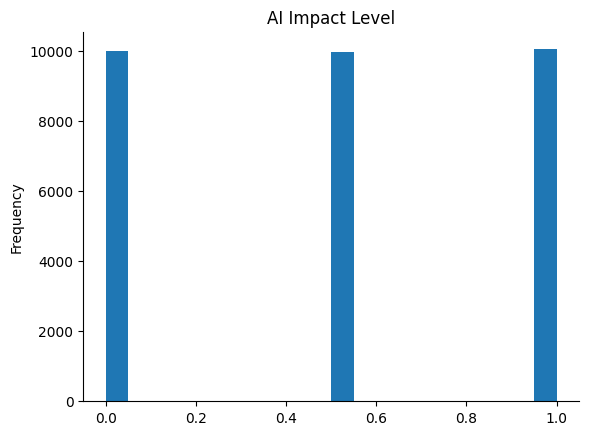

In [ ]:
QC['AI Impact Level'].plot(kind='hist', bins=20, title='AI Impact Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Distribution of Job Loss Risk')

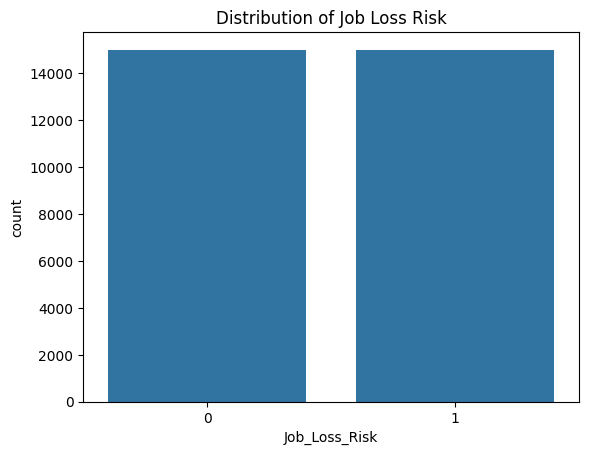

In [ ]:

sns.countplot(data=QC, x='Job_Loss_Risk')
plt.title("Distribution of Job Loss Risk")

 A graphical representation of a matrix where the individual values are represented as colors. In this case, it shows the correlation coefficients between all pairs of numerical columns in your DataFrame.

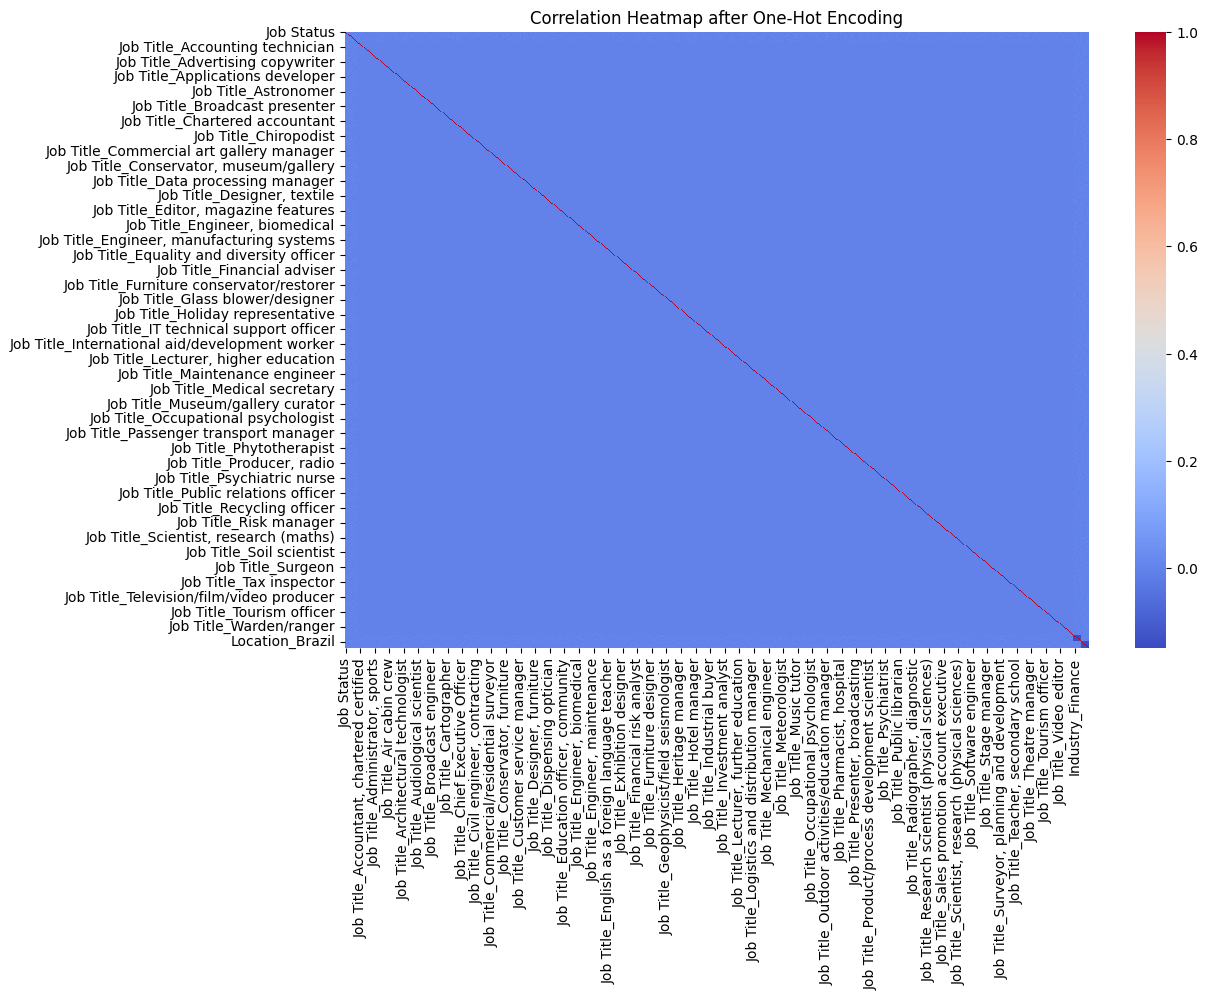

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(QC.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap after One-Hot Encoding")
plt.show()

In [ ]:
correlation_with_target = QC.corr()['Job_Loss_Risk'].sort_values(ascending=False)
print("\nCorrelation with Job_Loss_Risk:")
print(correlation_with_target)


Correlation with Job_Loss_Risk:
Job_Loss_Risk                               1.000000
Automation Risk (%)                         0.865733
Job Title_Dancer                            0.017025
Job Title_Politician's assistant            0.015321
Job Title_Audiological scientist            0.015067
                                              ...   
Job Title_Investment banker, operational   -0.013769
Job Title_Probation officer                -0.013889
Job Title_Careers adviser                  -0.014991
Job Title_Clinical psychologist            -0.015347
Job Title_Heritage manager                 -0.016378
Name: Job_Loss_Risk, Length: 663, dtype: float64


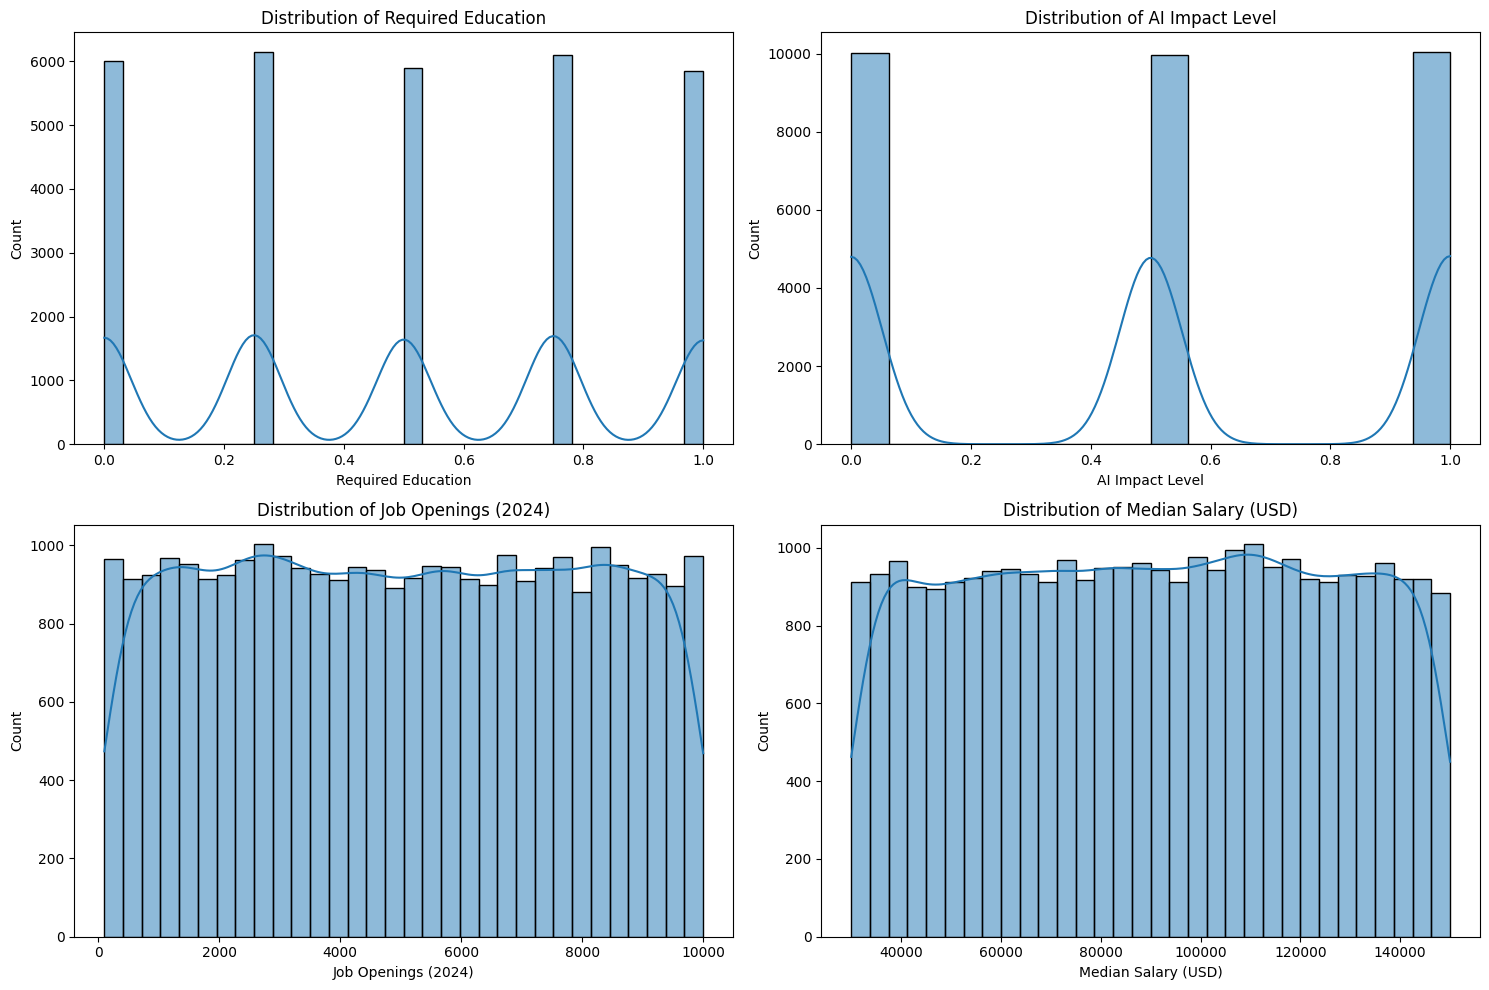

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(QC['Required Education'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Required Education')
sns.histplot(QC['AI Impact Level'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of AI Impact Level')
sns.histplot(QC['Job Openings (2024)'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Job Openings (2024)')
sns.histplot(QC['Median Salary (USD)'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Median Salary (USD)')
plt.tight_layout()
plt.show()

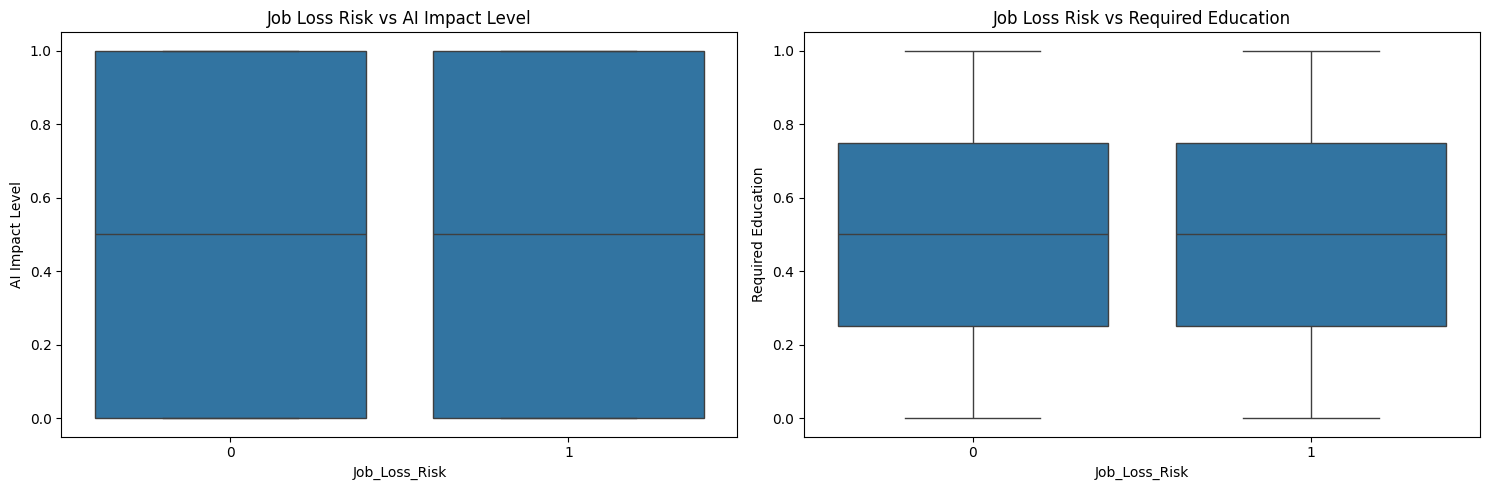

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Job_Loss_Risk', y='AI Impact Level', data=QC, ax=axes[0])
axes[0].set_title('Job Loss Risk vs AI Impact Level')
sns.boxplot(x='Job_Loss_Risk', y='Required Education', data=QC, ax=axes[1])
axes[1].set_title('Job Loss Risk vs Required Education')
plt.tight_layout()
plt.show()

**Feature Selection & Splitting**

In [ ]:
columns_to_drop = [
    'Job Title',
    'Automation Risk (%)',
    'Job_Loss_Risk'
]
X = QC.drop(columns=columns_to_drop, errors='ignore')
y = QC['Job_Loss_Risk']


X = X.select_dtypes(include=np.number)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Building and Training**

Predict job loss risk using ML.

In [ ]:
F3Nmodel = LogisticRegression(
    random_state=42,
    solver='liblinear',
    class_weight='balanced',
    C=0.1
)
F3Nmodel.fit(X_train_scaled, y_train)
lr_y_pred = F3Nmodel.predict(X_test_scaled)
F3Nmodel_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Tuned Logistic Regression Accuracy on Test Set: {F3Nmodel_accuracy}")

Tuned Logistic Regression Accuracy on Test Set: 0.5051666666666667


A Grid Search, which automatically tests various combinations of settings to find the optimal model, maximizing your accuracy.

In [157]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [5, 10],
    'class_weight': ['balanced', None]
}

Ques_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=Ques_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [158]:
Ques_accuracy = accuracy_score(y_test, y_pred)

print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Tuned Random Forest Accuracy on Test Set: {Ques_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy on Test Set: 0.5003333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2999
           1       0.50      0.50      0.50      3001

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



In [159]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Ques_model = LogisticRegression(class_weight='balanced', random_state=42)
Ques_model.fit(X_train_scaled, y_train)
with open('Ques_model.pkl', 'wb') as file:
    pickle.dump(Ques_model, file)

I've prepares my training data by scaling it, trains a Logistic Regression model to predict job loss risk and then I saved my model, the fitted scaler and the trained model using pickle to files for my dashboard


**Drone Programming Discussion**



For drone programming, I've seen a few languages and frameworks used frequently

Python: This is a very popular choice, especially for higher-level control and mission planning. Python has a rich ecosystem of libraries, and there are several excellent SDKs available that make it easier to interact with drone flight controllers. Libraries like DroneKit (though becoming less actively maintained) and MAVSDK are examples that allow you to send commands, receive telemetry data, and plan autonomous missions using Python. Its readability and ease of use make it a good starting point for many.
C++: For lower-level control, performance-critical tasks, and developing custom flight controller firmware, C++ is often the preferred language. It provides more direct control over hardware resources, which is essential for real-time flight control systems. Many popular open-source flight control platforms like PX4 and ArduPilot are primarily written in C++.
ROS (Robot Operating System): While not a programming language itself, ROS is a flexible framework used for building robot applications, and this includes drones. ROS provides tools and libraries for tasks like navigation, perception, and control, and it supports multiple programming languages, including Python and C++. If you're building a complex drone application that involves multiple sensors and sophisticated behaviors, ROS can be a powerful tool.
Specific Vendor SDKs: Many drone manufacturers provide their own SDKs for their specific drone models. These SDKs offer tailored APIs (Application Programming Interfaces) for accessing the unique features and capabilities of their hardware. Examples include the DJI SDK or the Parrot SDKs. Using these can simplify development if you are working with a particular brand of drone.
When I'm approaching a drone programming task, I usually consider the complexity of the task, the required performance, and the specific drone hardware being used to decide which language and framework are the most suitable. For rapid prototyping and higher-level tasks, Python with an SDK is often my go-to, while for more embedded or performance-sensitive applications, C++ or a framework like ROS might be necessary.